In [34]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob
from keras.preprocessing import image
from sklearn.cluster import KMeans
from skimage.feature import hog
from skimage import exposure
from skimage.measure import label

In [35]:
All_files = glob.glob("Animals/*/*.*")

In [36]:
image = []
for i in All_files:
    lst = []
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Create Image Feature
    # Bluring image to reduce noise
    blur = cv2.GaussianBlur(img,(5,5),0) #Gaussian Filtering
    # Calculate HoG of image
    fd, hog_image = hog(blur, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=True)
    lst.append(img)
    lst.append(blur)
    lst.append(fd)
    lst.append(hog_image)
    image.append(lst)
    


C:\Users\ryu\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\_shared\utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)


Text(0.5, 1.0, 'histogram')

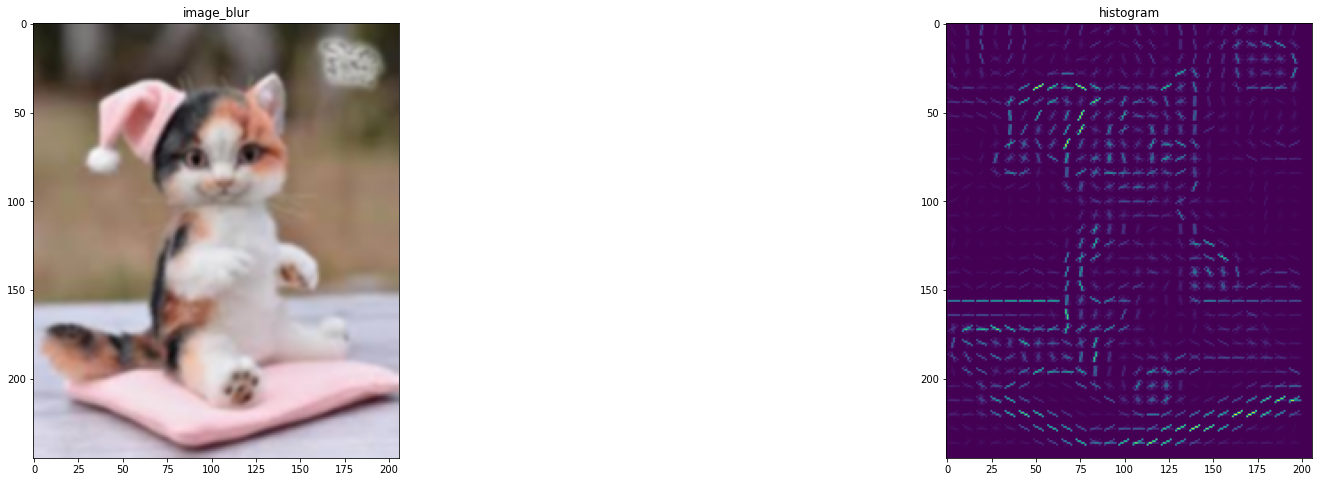

In [37]:
plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
plt.imshow(image[0][1])
plt.title('image_blur')
plt.subplot(1,2,2)
plt.imshow(image[0][3])
plt.title('histogram')

In [38]:
#Define block size for subimage
Block_size = (40,20) # ลองอย่างน้อย 3 ค่า เช่น (40,20), (40, 30), (60, 20), (60,30), (60,40)
# Define stride (ระยะขยับ pixel เพื่อทำ sliding window เพื่อคำนวณ HoG)
Stride = (10, 10)

#image
image = cv2.imread("Animals/Cats/cat2.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [39]:
# Define Sliding window position of row, column (Top left position)
posRow = np.arange(0, image.shape[0] - Block_size[0]+1, Stride[0])
posCol = np.arange(0,image.shape[1] - Block_size[1]+1, Stride[1])

print(f"posRow = {posRow} posCol = {posCol}")

posRow = [   0   20   40   60   80  100  120  140  160  180  200  220  240  260
  280  300  320  340  360  380  400  420  440  460  480  500  520  540
  560  580  600  620  640  660  680  700  720  740  760  780  800  820
  840  860  880  900  920  940  960  980 1000 1020 1040 1060 1080 1100
 1120 1140 1160 1180 1200 1220 1240 1260 1280 1300 1320 1340 1360] posCol = [   0   20   40   60   80  100  120  140  160  180  200  220  240  260
  280  300  320  340  360  380  400  420  440  460  480  500  520  540
  560  580  600  620  640  660  680  700  720  740  760  780  800  820
  840  860  880  900  920  940  960  980 1000 1020 1040 1060 1080 1100
 1120 1140 1160 1180 1200 1220 1240 1260 1280 1300 1320 1340 1360 1380]


In [40]:
# Create subimage feature
# Calculate HoG of each subimage in Sliding window
hogfeatures = []
for i in range(len(posRow)):
    for j in range(len(posCol)):
        startH = posRow[ i ]
        endH = posRow[i] + Block_size[0]
        startW = posCol[ j ]
        endW = posCol[j] + Block_size[1]
        #print(f"startH = {startH} endH = {endH} startW = {startW} endW = {endW}")
        subImg = image[startH:endH,startW:endW,:]
        blur = cv2.GaussianBlur(subImg,(5,5),0) #Gaussian Filtering
        fd, hog_image = hog(blur, orientations=9, pixels_per_cell=(4, 4),cells_per_block=(2, 2), visualize=True, multichannel=True)
        #print(hog_image)
        hogfeatures.append(fd)


Text(0.5, 1.0, 'histogram')

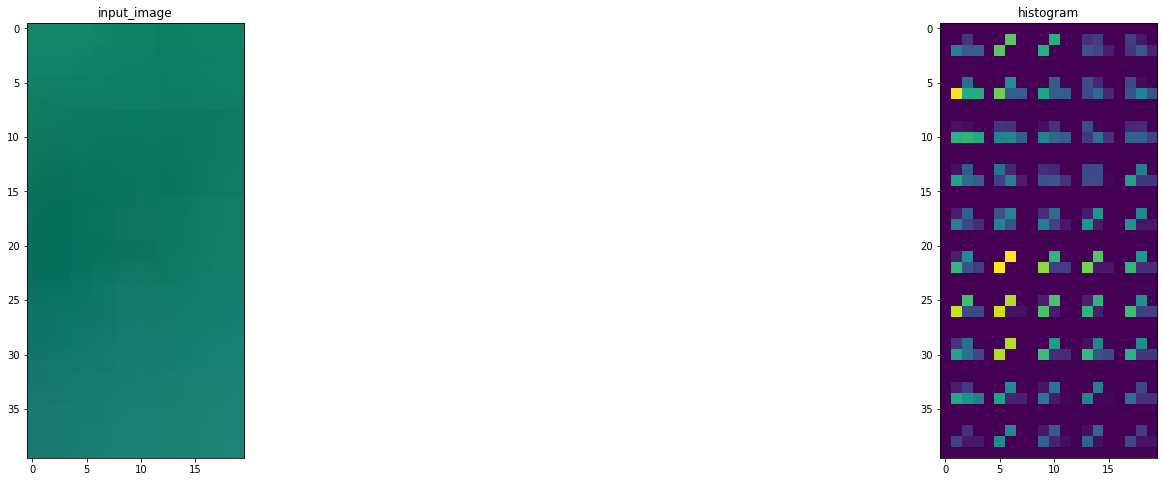

In [41]:
plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
plt.imshow(subImg)
plt.title('input_image')
plt.subplot(1,2,2)
plt.imshow(hog_image)
plt.title('histogram')

In [42]:
print(hogfeatures)

[array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 0.2380615 , ..., 0.15357378, 0.        ,
       0.        ]), array([0.2016559 , 0.        , 0.26344216, ..., 0.        , 0.        ,
       0.        ]), array([0.35872297, 0.        , 0.35872297, ..., 0.        , 0.        ,
       0.        ]), array([0.       , 0.       , 0.       , ..., 0.1505164, 0.       ,
       0.       ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.3475977, 0.       , 0.       , ..., 0.       , 0.       ,
       0.       ]), array([0.        , 0.        , 0.19649437, ..., 0.29189346, 0.        ,
       0.        ]), array([0.21914748, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 0.        , ..., 0.15061881, 0.        ,
       0.        ]), array([0.22106684, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ]), array([0.20676383, 0.        , 0.33311159, ..., 0.        , 

In [43]:
print(np.isnan(hogfeatures).any())
hogfeatures = np.where(np.isnan(hogfeatures), 0, hogfeatures)

False


In [44]:
#K-mean Clustering
N = 2
kmeans = KMeans(n_clusters=N, random_state=0)
clusters = kmeans.fit_predict(hogfeatures)

In [45]:
# Reshape clusterID result to Grid
print(f"posRow = {len(posRow)} posCol = {len(posCol)}")
cluster_array = clusters.reshape(len(posRow),len(posCol))

posRow = 69 posCol = 70


[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 1 ... 0 1 1]
 [0 0 1 ... 0 1 1]
 [0 0 0 ... 1 0 0]]


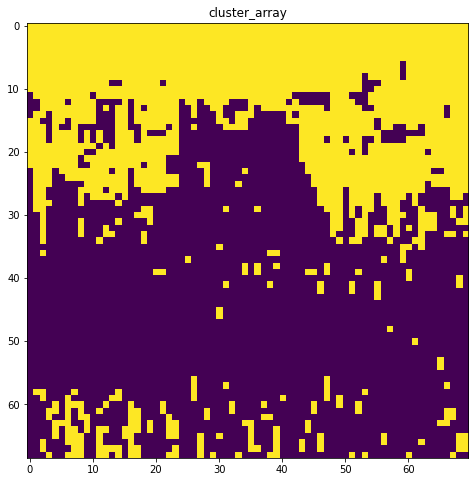

In [46]:
plt.figure(figsize=(30,8))
plt.subplot(1,1,1)
plt.imshow(cluster_array)
plt.title('cluster_array')

print(cluster_array)

In [49]:
# ReAssign Label in case of multiple ROIs with the same clusterID
all_labels = label(cluster_array)
# Define bounding box parameter
Color = (255,0,0)
Thickness = 3

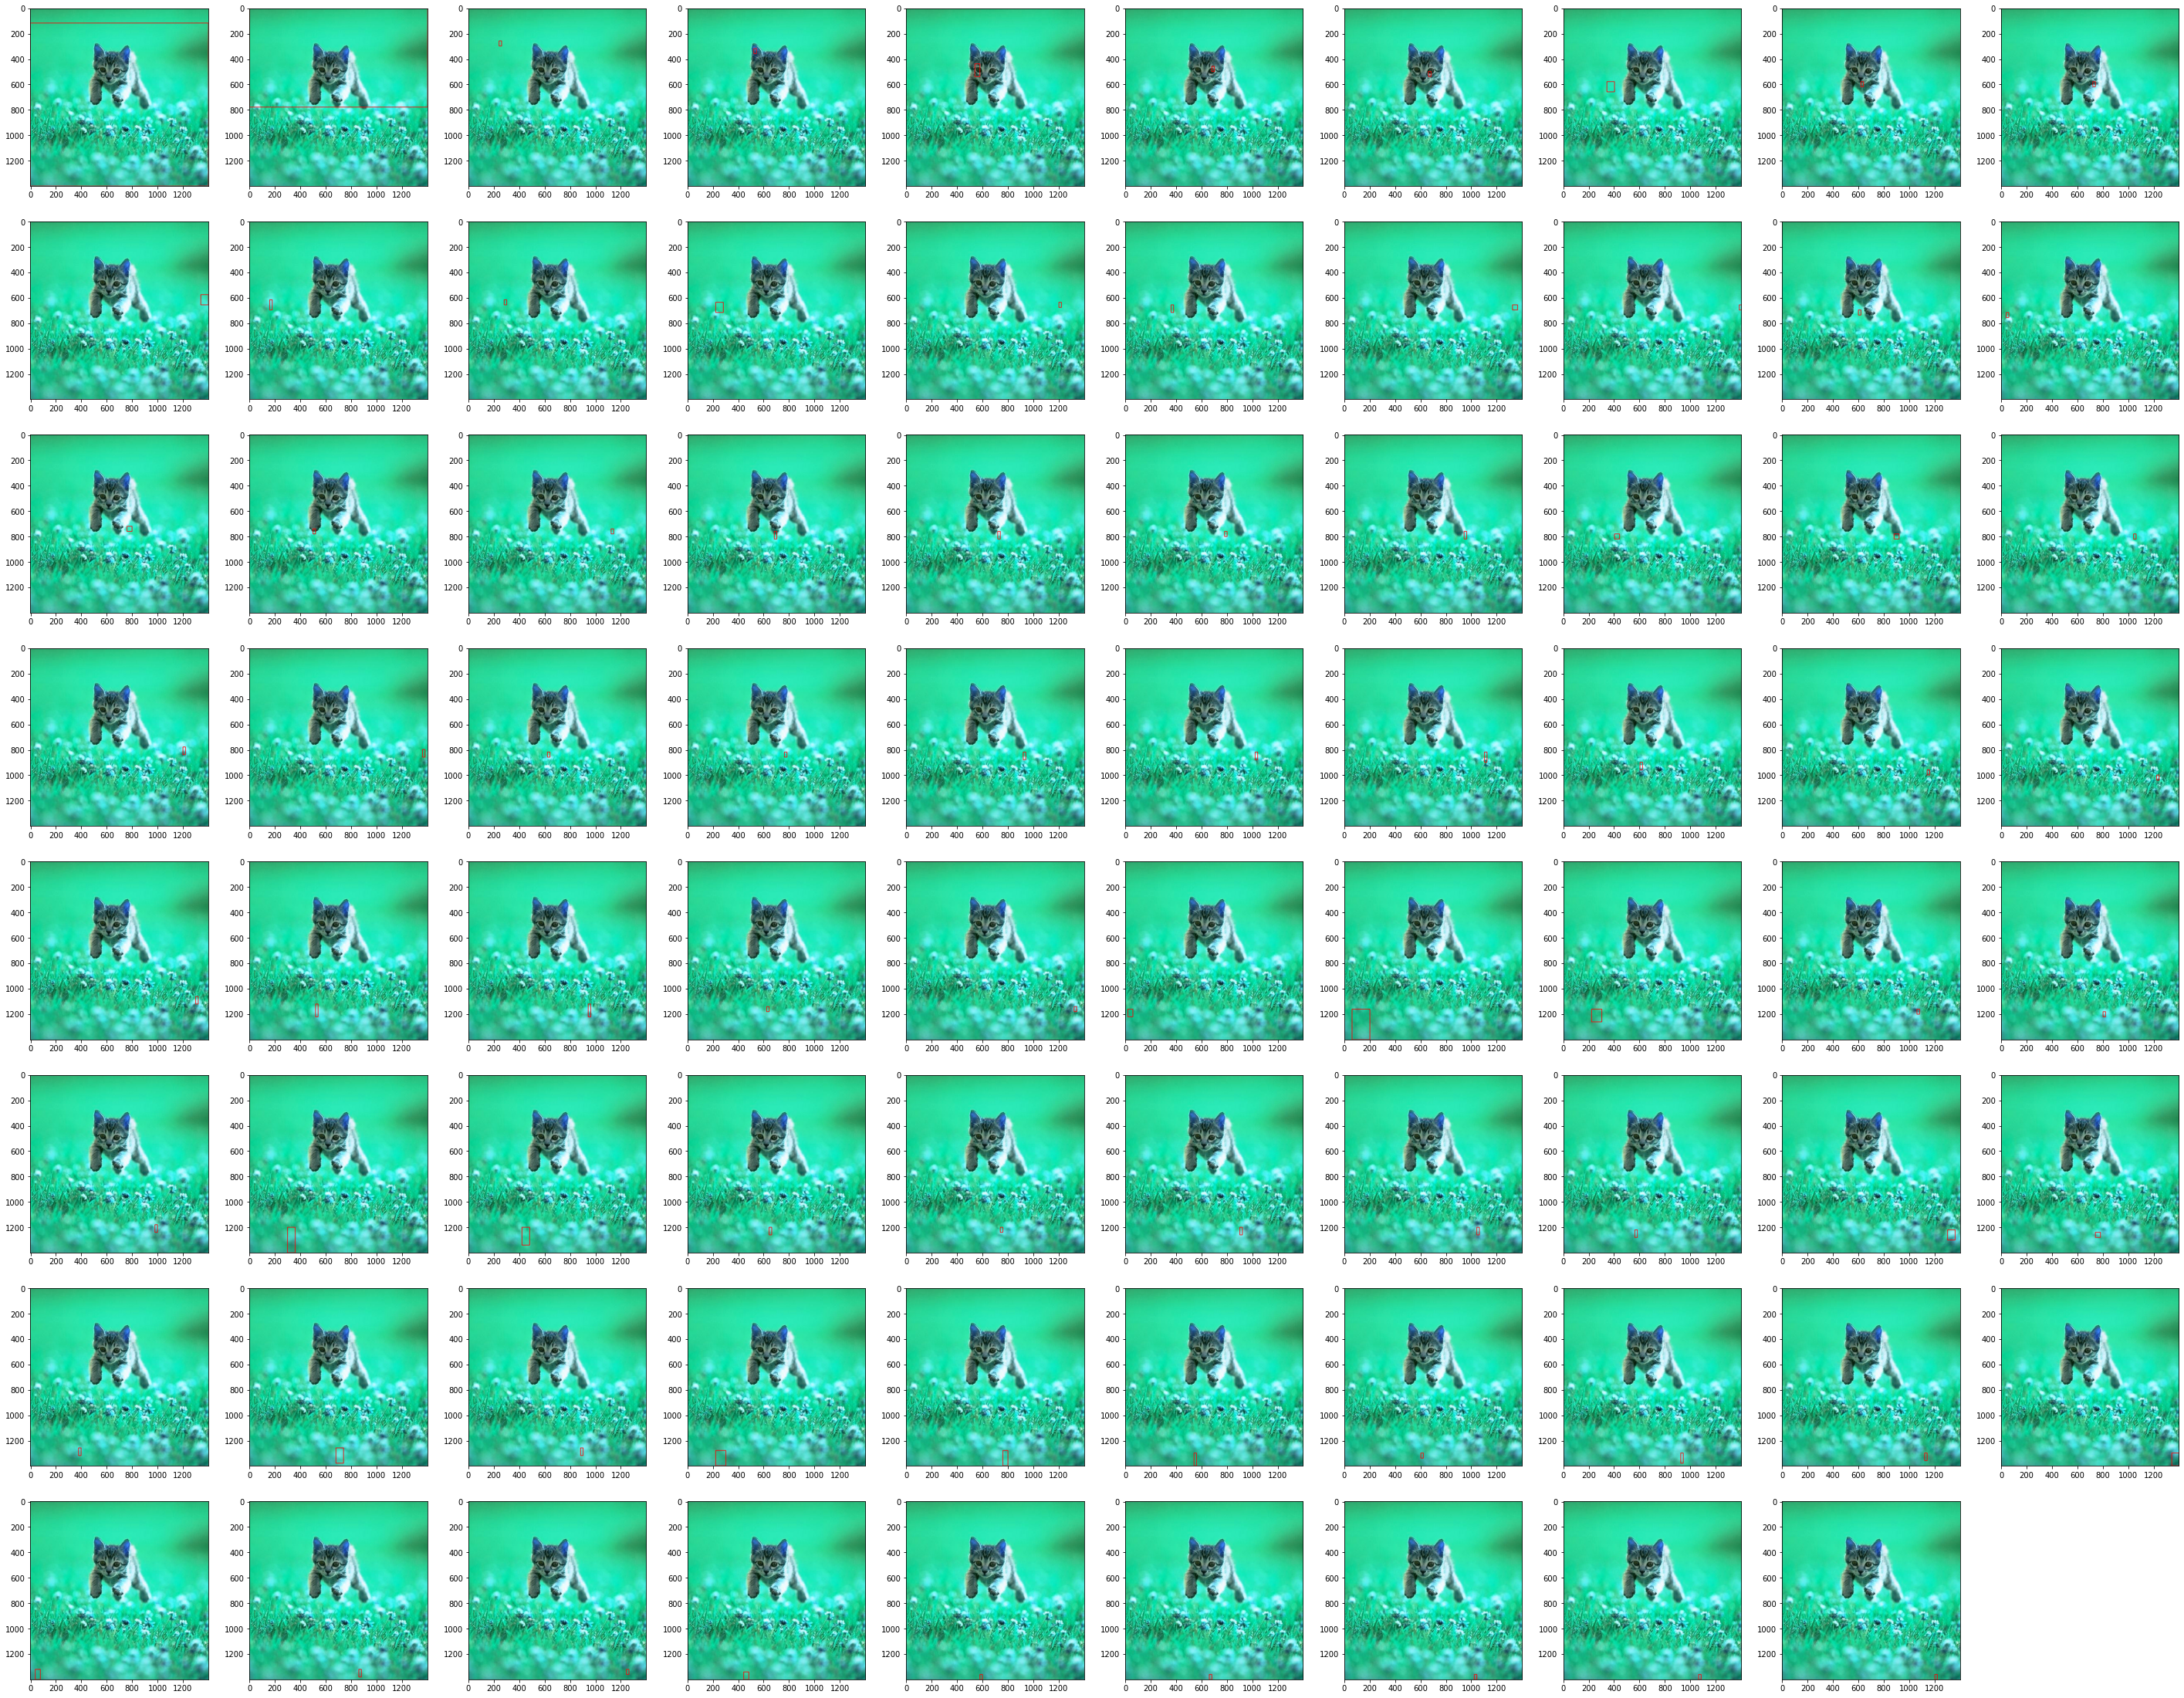

In [50]:
# ROI bounding box
square = 10
ix = 1
plt.figure(figsize=(50,50))

nClass = np.unique(all_labels)
for i in nClass:
    #calculate from grid to actual position
    objPos = np.argwhere(all_labels == i)
    startBlockH = objPos[:,0].min()
    endBlockH = objPos[:,0].max()
    startBlockW = objPos[:,1].min()
    endBlockW = objPos[:,1].max()
    startF = (posCol[startBlockW], posRow[startBlockH])
    endF =(posCol[endBlockW]+Block_size[1], posRow[endBlockH]+Block_size[0])
    #print(f"startF = {startF} , endF = {endF}")
    # draw regtangle boundary
    ROI_bounding_img = cv2.rectangle(image.copy(), startF, endF, Color, Thickness)
    ax = plt.subplot(square, square, ix)
    plt.imshow(ROI_bounding_img)
    ix += 1